In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement = Base.classes.measurement

station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
session.query(measurement.date).order_by(measurement.date).first()

('2010-01-01',)

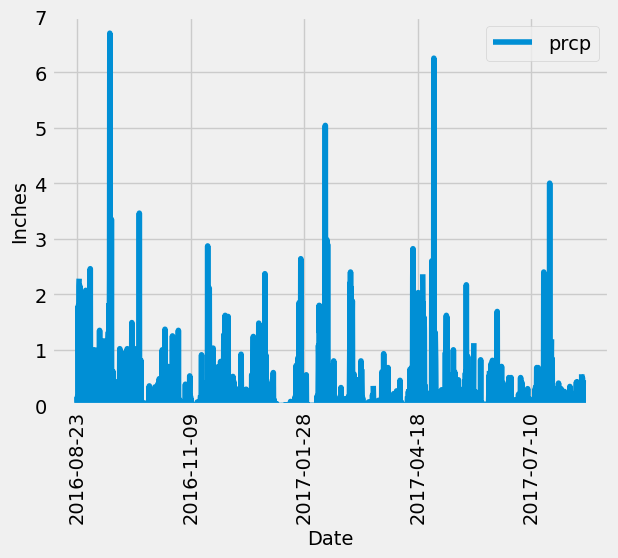

In [17]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
#end_date = session.query(measurement.date).order_by(measurement.date.desc()).first()

# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.

#last_date = dt.datetime.strptime(end_date[0], '%Y-%m-%d')
#first_date = last_date - dt.timedelta(days=365)



# Perform a query to retrieve the data and precipitation scores
precip = session.query(measurement.date, measurement.prcp).\
        filter(measurement.date > '2016-08-22').\
        order_by(measurement.date).all()




#sel = [measurement.date, 
 #      func.sum(measurement.prcp)]
#precip = session.query(*sel).\
 #       filter(func.strftime(measurement.date) >= first_date).\
  #      group_by(measurement.date).\
   #     order_by(measurement.date).all()
     

# Save the query results as a Pandas DataFrame. Explicitly set the column names
#precip_df = pd.DataFrame(precip, columns=['measurement_date', 'precipitation_amount'])
#precip_df.dropna(axis=0, how='any', inplace=True)


# Sort the dataframe by date
precip_df = pd.DataFrame(precip)
precip_df_final = precip_df.set_index('date')
precip_df_final



#precip_df.sort_values(by='measurement_date')
#precip_df.set_index('measurement_date', inplace=True)
#precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data

precip_df_final.plot()
plt.ylim(0,7)
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Inches')
plt.show()


In [18]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_df_final.describe()

,prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [19]:
# Design a query to calculate the total number of stations in the dataset
total_stations_count = session.query(station.station).count()
total_stations_count

9

In [20]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations_count = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).all()
print(active_stations_count)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [21]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = session.query(measurement.station,func.count(measurement.station)).\
    order_by(func.count(measurement.station).desc()).\
    group_by(measurement.station).first()

# Refer to most active station id
most_active_station_id = most_active_station[0]
most_active_station_id

# Lowest temperature
lowest_temp = session.query(func.min(measurement.tobs)).\
    filter(measurement.station==most_active_station_id).all()
print(lowest_temp)

# Highest temperature 
highest_temp = session.query(func.max(measurement.tobs)).\
    filter(measurement.station==most_active_station_id).all()
print(highest_temp)

# Average temperature
avg_temp = session.query(func.avg(measurement.tobs)).\
    filter(measurement.station==most_active_station_id).all()

print(avg_temp)

[(54.0,)]
[(85.0,)]
[(71.66378066378067,)]


(0.0, 70.0)

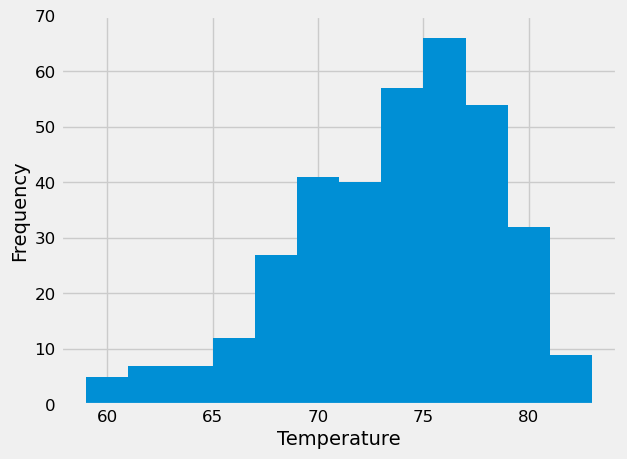

In [22]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

# Find the most recent date in the most active station

# print(most_active_station)
    # 2017-08-18 is the most recent date

# Query to find dates 12 months before 
most_active_station= session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    order_by(measurement.date.desc()).first()

# Found that 2017-08-18' is the most recent date for temp obeserved for most active station: USC00519281, tobs: 79

# Create query saying to find dates 12 months before 2017-08-08 (thus > 2016-08-08), for our most active station
twelve_month_values = session.query(measurement.date,measurement.tobs).\
    filter(measurement.station == most_active_station_id).\
    filter(measurement.date > '2016-08-17').all()

# Check to see if values appear correctly
# for value in twelve_month_values:
#     print(value)

# Plot
# Create series with just tobs from this 12 month period 
twelve_month_tobs_values_df = pd.DataFrame(twelve_month_values)["tobs"]
twelve_month_tobs_values_df 

hist = twelve_month_tobs_values_df.hist(bins=12) 
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0,70)


# Close Session

In [23]:
# Close Session
session.close()